<a href="https://colab.research.google.com/github/C0RD3LL/Omics/blob/main/NewTuxedoPack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#@title
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [32]:
#@title
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# Transcript-level expression analysis of RNA-seq experiments with HISAT, StringTie and Ballgown
RNA-seq experiments can be used to measure many phenomena. We consider an experiment that compares two biological conditions, such as case versus control, wild type versus mutant or disease versus normal comparisons. For each condition, we include six replicates, noting that three is the minimum number of replicates for valid statistical results. 

The example data used in this protocol comprise human RNA-seq. (Some program parameters may require adjustment to optimize the results for genomes with smaller intron sizes.) The data files are very large, as is often the case for high-throughput RNA-seq experiments; thus, to make the protocol faster and simpler for novice users, we have extracted a subset of the reads mapping to human chromosome X, which is a relatively gene-rich chromosome that spans 151 megabases (Mb), ~5% of the genome. The protocol describes the end-to-end analysis of these reads, but it will work equally well with the full data set, for which it will require significantly more computing time.

An overview of the ‘new Tuxedo’ protocol.

- Steps 1 & 2: aligning the RNA-seq reads to the genome: <20 min
- Steps 3–6: assembly and quantification of expressed genes and transcripts: ~15 min 
- Steps 7–16: Running of differential expression analysis protocol: ~5 min
- Steps 17–21: data visualization: variable

In [33]:
!sudo apt install hisat2 samtools fastqc rsem &> /dev/null
!conda install -c bioconda stringtie gffcompare

^C

CondaError: KeyboardInterrupt



In [ ]:
%%shell
wget ftp://ftp.ccb.jhu.edu/pub/RNAseq_protocol/chrX_data.tar.gz &> /dev/null
tar xvzf chrX_data.tar.gz &> /dev/null

~ 12 min run time 
Aling the RNA-seq reads to the reference genome

  In an experiment involving multiple RNA-seq data sets, reads are first mapped to the genome using HISAT (Steps 1 and 2). Annotation of reference genes and transcripts can be provided as input, but this is optional, as indicated by the dotted line. 
  
The alignments are then passed to StringTie (Step 3), which assembles and quantifies the transcripts in each sample. (In the alternative protocol, the alignments from Step 2 are passed directly to Step 6, skipping all assembly steps. Step 6 will then estimate abundance only for known, annotated transcripts.) After initial assembly, the assembled transcripts
are merged together (Step 4) by a special StringTie module, which creates
a uniform set of transcripts for all samples. StringTie can use annotation in both of these steps, as shown by the dotted lines. The gffcompare program then compares the genes and transcripts with the annotation and reports statistics on this comparison (Step 5). In Step 6, StringTie processes
the read alignments and either the merged transcripts or the reference annotation (through the diamond labeled ‘OR’). Using this input, StringTie re-estimates abundances where necessary and creates new transcript
tables for input to Ballgown. Ballgown then compares all transcripts across conditions and produces tables and plots of differentially expressed genes and transcripts (Steps 7–21). Black and curved blue lines in the figure represent input to and output from the programs, respectively. Optional inputs are represented by dotted lines.

This protocol begins with raw RNA-seq reads collected from all samples, and it produces several useful outputs, including lists of genes, transcripts and expression levels for each sample, tables showing differentially expressed genes between the two conditions and accompanying statistical measures of significance. First, reads from each sample are mapped to the reference genome with HISAT (Fig. 1). The user can provide a file of annotated gene positions as an option, and HISAT will use that file but it will also detect splice sites missing from the annotation.

In [ ]:
%%shell
hisat2 -p 8 --dta -x chrX_data/indexes/chrX_tran -1 chrX_data/samples/ERR188044_chrX_1.fastq.gz -2 chrX_data/samples/ERR188044_chrX_2.fastq.gz -S ERR188044_chrX.sam
hisat2 -p 8 --dta -x chrX_data/indexes/chrX_tran -1 chrX_data/samples/ERR188104_chrX_1.fastq.gz -2 chrX_data/samples/ERR188104_chrX_2.fastq.gz -S ERR188104_chrX.sam
hisat2 -p 8 --dta -x chrX_data/indexes/chrX_tran -1 chrX_data/samples/ERR188234_chrX_1.fastq.gz -2 chrX_data/samples/ERR188234_chrX_2.fastq.gz -S ERR188234_chrX.sam
hisat2 -p 8 --dta -x chrX_data/indexes/chrX_tran -1 chrX_data/samples/ERR188245_chrX_1.fastq.gz -2 chrX_data/samples/ERR188245_chrX_2.fastq.gz -S ERR188245_chrX.sam
hisat2 -p 8 --dta -x chrX_data/indexes/chrX_tran -1 chrX_data/samples/ERR188257_chrX_1.fastq.gz -2 chrX_data/samples/ERR188257_chrX_2.fastq.gz -S ERR188257_chrX.sam
hisat2 -p 8 --dta -x chrX_data/indexes/chrX_tran -1 chrX_data/samples/ERR188273_chrX_1.fastq.gz -2 chrX_data/samples/ERR188273_chrX_2.fastq.gz -S ERR188273_chrX.sam
hisat2 -p 8 --dta -x chrX_data/indexes/chrX_tran -1 chrX_data/samples/ERR188337_chrX_1.fastq.gz -2 chrX_data/samples/ERR188337_chrX_2.fastq.gz -S ERR188337_chrX.sam
hisat2 -p 8 --dta -x chrX_data/indexes/chrX_tran -1 chrX_data/samples/ERR188383_chrX_1.fastq.gz -2 chrX_data/samples/ERR188383_chrX_2.fastq.gz -S ERR188383_chrX.sam
hisat2 -p 8 --dta -x chrX_data/indexes/chrX_tran -1 chrX_data/samples/ERR188401_chrX_1.fastq.gz -2 chrX_data/samples/ERR188401_chrX_2.fastq.gz -S ERR188401_chrX.sam
hisat2 -p 8 --dta -x chrX_data/indexes/chrX_tran -1 chrX_data/samples/ERR188428_chrX_1.fastq.gz -2 chrX_data/samples/ERR188428_chrX_2.fastq.gz -S ERR188428_chrX.sam
hisat2 -p 8 --dta -x chrX_data/indexes/chrX_tran -1 chrX_data/samples/ERR188454_chrX_1.fastq.gz -2 chrX_data/samples/ERR188454_chrX_2.fastq.gz -S ERR188454_chrX.sam
hisat2 -p 8 --dta -x chrX_data/indexes/chrX_tran -1 chrX_data/samples/ERR204916_chrX_1.fastq.gz -2 chrX_data/samples/ERR204916_chrX_2.fastq.gz -S ERR204916_chrX.sam

In [ ]:
%%shell
samtools sort -@ 8 -o ERR188044_chrX.bam ERR188044_chrX.sam
samtools sort -@ 8 -o ERR188104_chrX.bam ERR188104_chrX.sam
samtools sort -@ 8 -o ERR188234_chrX.bam ERR188234_chrX.sam
samtools sort -@ 8 -o ERR188245_chrX.bam ERR188245_chrX.sam
samtools sort -@ 8 -o ERR188257_chrX.bam ERR188257_chrX.sam
samtools sort -@ 8 -o ERR188273_chrX.bam ERR188273_chrX.sam
samtools sort -@ 8 -o ERR188337_chrX.bam ERR188337_chrX.sam
samtools sort -@ 8 -o ERR188383_chrX.bam ERR188383_chrX.sam
samtools sort -@ 8 -o ERR188401_chrX.bam ERR188401_chrX.sam
samtools sort -@ 8 -o ERR188428_chrX.bam ERR188428_chrX.sam
samtools sort -@ 8 -o ERR188454_chrX.bam ERR188454_chrX.sam
samtools sort -@ 8 -o ERR204916_chrX.bam ERR204916_chrX.sam

In [ ]:
%%shell
stringtie -p 8 -G chrX_data/genes/chrX.gtf -o ERR188044_chrX.gtf -l ERR188044 ERR188044_chrX.bam
stringtie -p 8 -G chrX_data/genes/chrX.gtf -o ERR188104_chrX.gtf -l ERR188104 ERR188104_chrX.bam
stringtie -p 8 -G chrX_data/genes/chrX.gtf -o ERR188234_chrX.gtf -l ERR188234 ERR188234_chrX.bam
stringtie -p 8 -G chrX_data/genes/chrX.gtf -o ERR188245_chrX.gtf -l ERR188245 ERR188245_chrX.bam
stringtie -p 8 -G chrX_data/genes/chrX.gtf -o ERR188257_chrX.gtf -l ERR188257 ERR188257_chrX.bam
stringtie -p 8 -G chrX_data/genes/chrX.gtf -o ERR188273_chrX.gtf -l ERR188273 ERR188273_chrX.bam
stringtie -p 8 -G chrX_data/genes/chrX.gtf -o ERR188337_chrX.gtf -l ERR188337 ERR188337_chrX.bam
stringtie -p 8 -G chrX_data/genes/chrX.gtf -o ERR188383_chrX.gtf -l ERR188383 ERR188383_chrX.bam
stringtie -p 8 -G chrX_data/genes/chrX.gtf -o ERR188401_chrX.gtf -l ERR188401 ERR188401_chrX.bam
stringtie -p 8 -G chrX_data/genes/chrX.gtf -o ERR188428_chrX.gtf -l ERR188428 ERR188428_chrX.bam
stringtie -p 8 -G chrX_data/genes/chrX.gtf -o ERR188454_chrX.gtf -l ERR188454 ERR188454_chrX.bam
stringtie -p 8 -G chrX_data/genes/chrX.gtf -o ERR204916_chrX.gtf -l ERR204916 ERR204916_chrX.bam

In [ ]:
!stringtie --merge -p 8 -G chrX_data/genes/chrX.gtf -o stringtie_merged.gtf chrX_data/mergelist.txt

In [ ]:
%%shell
stringtie -e -B -p 8 -G stringtie_merged.gtf -o ballgown/ERR188044/ERR188044_chrX.gtf ERR188044_chrX.bam
stringtie -e -B -p 8 -G stringtie_merged.gtf -o ballgown/ERR188104/ERR188104_chrX.gtf ERR188104_chrX.bam
stringtie -e -B -p 8 -G stringtie_merged.gtf -o ballgown/ERR188234/ERR188234_chrX.gtf ERR188234_chrX.bam
stringtie -e -B -p 8 -G stringtie_merged.gtf -o ballgown/ERR188245/ERR188245_chrX.gtf ERR188245_chrX.bam
stringtie -e -B -p 8 -G stringtie_merged.gtf -o ballgown/ERR188257/ERR188257_chrX.gtf ERR188257_chrX.bam
stringtie -e -B -p 8 -G stringtie_merged.gtf -o ballgown/ERR188273/ERR188273_chrX.gtf ERR188273_chrX.bam
stringtie -e -B -p 8 -G stringtie_merged.gtf -o ballgown/ERR188337/ERR188337_chrX.gtf ERR188337_chrX.bam
stringtie -e -B -p 8 -G stringtie_merged.gtf -o ballgown/ERR188383/ERR188383_chrX.gtf ERR188383_chrX.bam
stringtie -e -B -p 8 -G stringtie_merged.gtf -o ballgown/ERR188401/ERR188401_chrX.gtf ERR188401_chrX.bam
stringtie -e -B -p 8 -G stringtie_merged.gtf -o ballgown/ERR188428/ERR188428_chrX.gtf ERR188428_chrX.bam
stringtie -e -B -p 8 -G stringtie_merged.gtf -o ballgown/ERR188454/ERR188454_chrX.gtf ERR188454_chrX.bam
stringtie -e -B -p 8 -G stringtie_merged.gtf -o ballgown/ERR204916/ERR204916_chrX.gtf ERR204916_chrX.bam


#R analysis part

In [ ]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install(c(("genefilter"),("ballgown")))

In [ ]:
%R devtools::install_github('alyssafrazee/RSkittleBrewer')

In [ ]:
%%R
library(dplyr)
library(devtools)
library(RSkittleBrewer)
library(ballgown)
library(genefilter)

In [14]:
%%R
pheno_data = read.csv("/content/chrX_data/geuvadis_phenodata.csv")

In [ ]:
%%R
bg_chrX = ballgown(dataDir = "ballgown", samplePattern = "ERR", pData=pheno_data)
bg_chrX_filt = subset(bg_chrX,"rowVars(texpr(bg_chrX)) >1",genomesubset=TRUE)
results_transcripts = stattest(bg_chrX_filt, feature="transcript",covariate="sex",adjustvars = c("population"), getFC=TRUE, meas="FPKM")
results_genes = stattest(bg_chrX_filt, feature="gene", covariate="sex", adjustvars = c("population"), getFC=TRUE, meas="FPKM")
results_transcripts = data.frame(geneNames=ballgown::geneNames(bg_chrX_filt), geneIDs=ballgown::geneIDs(bg_chrX_filt), results_transcripts)
results_transcripts = arrange(results_transcripts,pval)
results_genes = arrange(results_genes,pval)

In [18]:
%%R
subset(results_transcripts,results_transcripts$qval<0.05)
subset(results_genes,results_genes$qval<0.05)

  feature        id          fc         pval         qval
1    gene MSTRG.518 0.002837501 6.771532e-10 6.121465e-07
2    gene MSTRG.517 0.057335020 4.858256e-07 2.195932e-04
3    gene MSTRG.373 0.569867012 4.611162e-06 1.389497e-03
4    gene MSTRG.137 3.109255753 1.871016e-05 3.964006e-03
5    gene MSTRG.718 0.246222692 2.192481e-05 3.964006e-03
6    gene  MSTRG.55 0.600461675 5.538353e-05 8.344452e-03
7    gene MSTRG.713 0.333663973 7.336781e-05 9.474929e-03
8    gene MSTRG.503 0.621368951 1.381850e-04 1.561491e-02


In [19]:
%%R
tropical= c('darkorange', 'dodgerblue', 'hotpink', 'limegreen', 'yellow')
palette(tropical)

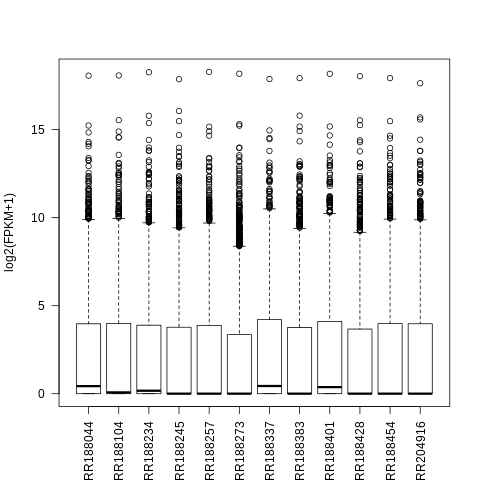

In [20]:
%%R
fpkm = texpr(bg_chrX,meas="FPKM")
fpkm = log2(fpkm+1)
boxplot(fpkm,col=as.numeric(pheno_data$sex),las=2,ylab='log2(FPKM+1)')

In [ ]:
%%R
plot(fpkm[12,] ~ pheno_data$sex, border=c(1,2), main=paste(ballgown::geneNames(bg_chrX)[12],' : ', ballgown::transcriptNames(bg_chrX)[12]),pch=19, xlab="Sex", ylab='log2(FPKM+1)')

In [ ]:
%%R 
plotTranscripts(ballgown::geneIDs(bg_ chrX)[1729], bg_chrX, main=c('Gene XIST in sample ERR188234'), sample=c('ERR188234'))

In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [28]:
pheno_df = pd.read_csv("/content/chrX_data/geuvadis_phenodata.csv")

In [30]:
pheno_df.head()

,ids,sex,population
0,ERR188044,male,YRI
1,ERR188104,male,YRI
2,ERR188234,female,YRI
3,ERR188245,female,GBR
4,ERR188257,male,GBR
